In [1]:
import pandas as pan
import matplotlib.pyplot as plot

In [2]:
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
base = pan.read_csv('Clean_Dataset.csv')

In [4]:
base.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
base = base.drop(columns= ['Unnamed: 0'])

In [8]:
y = base.iloc[:,10]
X = base.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values

In [9]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [10]:
labelencoder = LabelEncoder()

for i in range(X.shape[1]):
    if X[:,i].dtype == 'object':
        X[:,i] = labelencoder.fit_transform(X[:,i])

In [11]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y, test_size = 0.3, random_state=1)

In [12]:
modelo = DecisionTreeRegressor(random_state=1)
modelo.fit(X_treinamento, y_treinamento)

DecisionTreeRegressor(random_state=1)

In [13]:
previsoes = modelo.predict(X_teste)
previsoes

array([ 6048.,  6548.,  2836., ...,  8112.,  3090., 69580.])

In [14]:
meanSquared = mean_squared_error(y_teste, previsoes)
r2Score = r2_score(y_teste, previsoes)
print(f"Mean Squared Error: {meanSquared} e R2 Score: {r2Score}")

Mean Squared Error: 8727916.534325048 e R2 Score: 0.9830065446668494


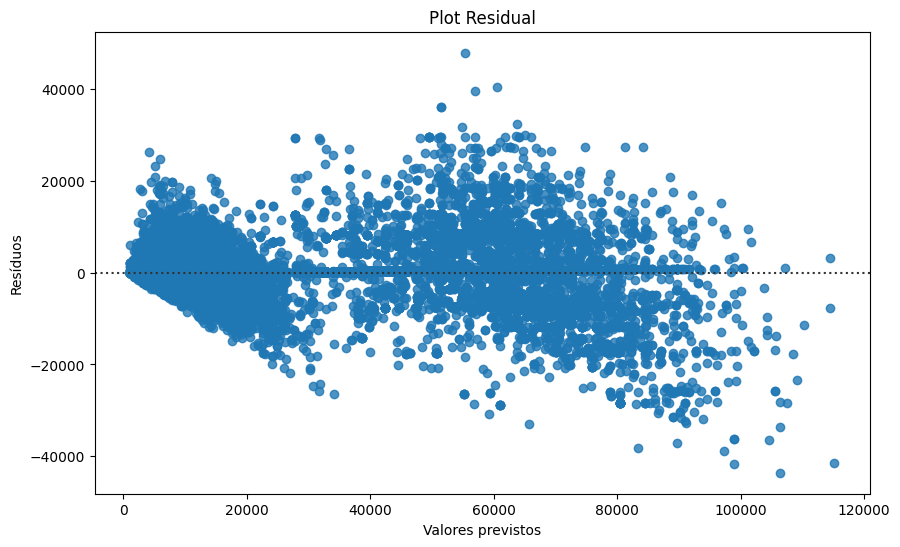

In [16]:
residuos = y_teste - previsoes
plot.figure(figsize=(10,6))
sea.residplot(x=previsoes, y=residuos, line_kws={"color": "blue"})
plot.xlabel("Valores previstos")
plot.ylabel("Resíduos")
plot.title("Plot Residual")
plot.show()

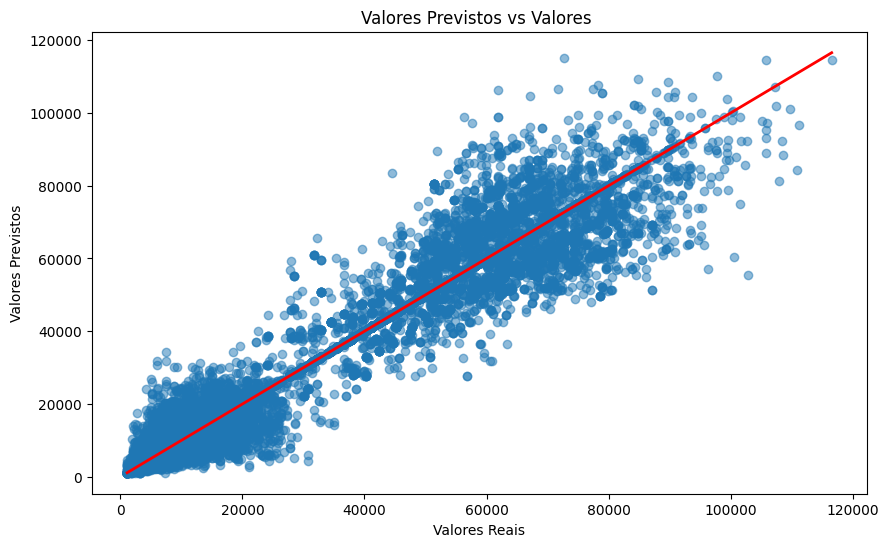

In [17]:
plot.figure(figsize=(10, 6))
plot.scatter(y_teste, previsoes, alpha=0.5)
plot.xlabel("Valores Reais")
plot.ylabel("Valores Previstos")
plot.title("Valores Previstos vs Valores ")
plot.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], color='red', lw=2)  # Linha de referência
plot.show()